In [0]:
# install the PEQNP package
!pip install PEQNP
# video :  https://youtu.be/VFhKg5Oht0w 

In [0]:
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
from peqnp import *

warnings.simplefilter("ignore")

In [0]:
# plot the cities and tour
def plot(seq):
    print(opt, seq)
    u, v = zip(*data[list(seq) + [seq[0]]])
    plt.plot(u, v, 'k-')
    plt.plot(u, v, 'ro')
    plt.show()

# the simple distance function used as oracle by the hess algorithm
def distance(seq):
    return np.sum(int(matrix[seq[i - 1]][seq[i]]) for i in range(n))

In [0]:
# the maximun bits for the problems, with this ensure that all problem is represented on the engine
n = 200
seed = np.random.randint(1, 2 ** 16)
np.random.seed(seed)

In [23]:
%time
# create the random instance for the defined seed
data = np.random.randint(0, 100, size=(n, 2))
matrix = np.zeros(shape=(n, n))
for i in range(n):
    for j in range(n):
        matrix[i][j] = np.linalg.norm(data[i] - data[j])
# the maximun bits for the problems, with this ensure that all problem is represented on the engine
bits = int(np.sum(matrix.flatten())).bit_length() + 1

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs
1103 [64, 96, 170, 122, 125, 65, 114, 110, 83, 17, 60, 92, 192, 126, 55, 118, 40, 195, 127, 188, 133, 38, 95, 117, 4, 48, 171, 24, 167, 152, 189, 9, 44, 53, 36, 62, 101, 77, 161, 20, 138, 52, 84, 123, 115, 111, 75, 32, 11, 31, 47, 193, 12, 22, 191, 187, 30, 136, 102, 129, 81, 177, 82, 142, 184, 71, 175, 88, 35, 160, 186, 7, 46, 104, 19, 108, 163, 169, 140, 146, 194, 124, 18, 155, 45, 178, 132, 196, 179, 13, 0, 150, 190, 174, 27, 58, 131, 183, 61, 173, 105, 135, 144, 23, 185, 42, 164, 14, 130, 198, 37, 159, 86, 90, 69, 76, 134, 93, 148, 97, 49, 176, 2, 91, 143, 100, 34, 3, 119, 168, 80, 157, 85, 145, 66, 54, 72, 89, 158, 109, 113, 149, 107, 59, 112, 50, 6, 8, 165, 98, 70, 5, 33, 28, 74, 87, 25, 153, 181, 57, 162, 15, 141, 73, 67, 166, 154, 16, 180, 51, 56, 172, 43, 94, 10, 26, 41, 39, 1, 21, 128, 78, 182, 120, 103, 139, 197, 106, 99, 151, 79, 199, 137, 63, 29, 156, 147, 121, 116, 68]


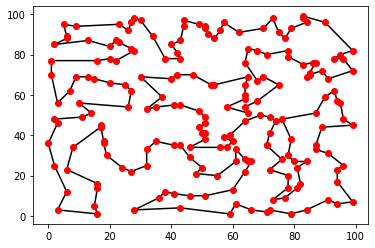

In [24]:
%time
# call the hess algorithm for get the optimal?
seq = hess_sequence(n, oracle=distance)
# set the distance found by hess as the current optimal
opt = distance(seq)
# plot the hess solution
plot(seq)
# note that hess is very fast because is polynomial (universal black box aproximator) and in this case get the optimal
# not use with n > 20 withouth hess is heavy RAM consumming (for the current model)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
418 [6 5 4 3 2 1 0 7]


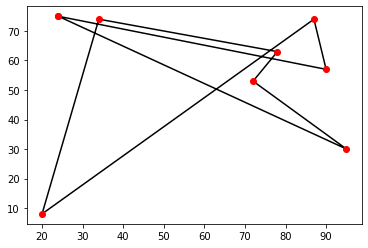

358 [2 5 4 0 7 1 6 3]


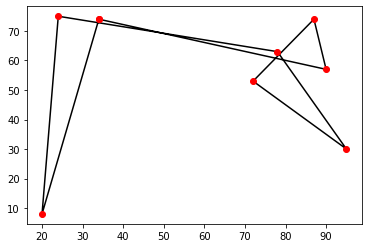

351 [3 7 1 2 6 0 5 4]


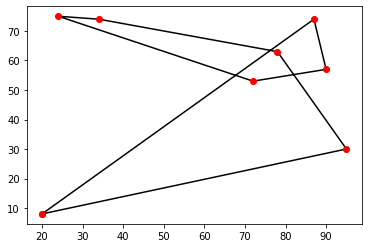

337 [0 7 3 5 1 4 2 6]


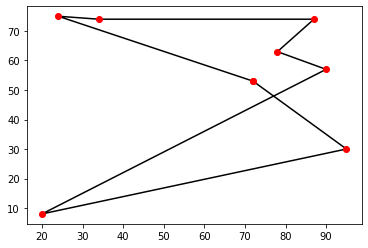

284 [5 7 0 3 6 2 4 1]


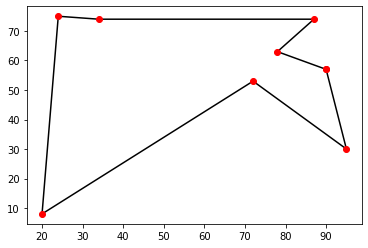

280 [1 2 6 3 7 5 4 0]


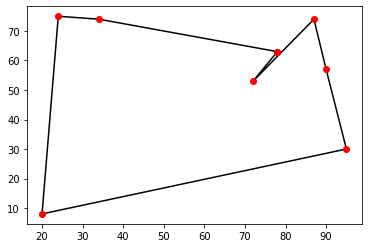

267 [0 1 4 5 7 3 6 2]


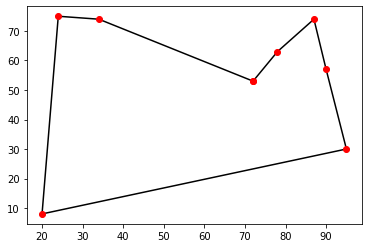

OPTIMUM FOUND


In [18]:
%time
# set the 2 ** bits - 1 as the current optimal
opt = 2 ** bits - 1
while True:
    engine(bits)
    x, y = matrix_permutation(matrix.flatten(), n)
    assert np.sum(y) < opt
    if satisfy(turbo=True):
        seq = np.vectorize(int)(x)
        opt = distance(seq)
        plot(seq)
    else:
        break
print('OPTIMUM FOUND')